In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.integrate import odeint

In [2]:
p = 2.2 #air density in kg/m^3
radius=0.06
angle0=38*math.pi/180.0
C= 0.47

drag_constant= 0.5*math.pi*radius**2*p*C
g=9.81

y0=8.0
x0=0.0
Vx0=110*np.cos(angle0)
Vy0=110*np.sin(angle0)

In [3]:
def dxdt(Vx):
    return Vx

def dydt(Vy):
    return Vy

def dVxdt(Vx,Vy):
    return -drag_constant*Vx*np.sqrt(Vx**2+Vy**2)

def dVydt(Vx,Vy):
    return -g-drag_constant*Vy*np.sqrt(Vx**2+Vy**2)
    

In [4]:
N=1000 #number of steps in integration
t1=0.0  #initial time
t2=8.3 #final time
t=np.linspace(t1,t2,N)
h=(t2-t1)/N  #time step

In [5]:
#RK4 Method

x=np.zeros(N)
y=np.zeros(N)
Vx=np.zeros(N)
Vy=np.zeros(N)

x[0]=x0
y[0]=y0
Vx[0]=Vx0
Vy[0]=Vy0


for i in range (1,N):
    xi=x[i-1]
    yi=y[i-1]
    Vxi=Vx[i-1]
    Vyi=Vy[i-1]
    
    
    k1x=h*dxdt(Vxi)
    k1y=h*dydt(Vyi)
    k1Vx=h*dVxdt(Vxi,Vyi)
    k1Vy=h*dVydt(Vxi,Vyi)
    
    k2x=h*dxdt(Vxi+k1Vx/2)
    k2y=h*dydt(Vyi+k1Vy/2)
    k2Vx=h*dVxdt(Vxi+k1Vx/2,Vyi+k1Vy/2)
    k2Vy=h*dVydt(Vxi+k1Vx/2,Vyi+k1Vy/2)
    
    k3x=h*dxdt(Vxi+k2Vx/2)
    k3y=h*dydt(Vyi+k2Vy/2)
    k3Vx=h*dVxdt(Vxi+k2Vx/2,Vyi+k2Vy/2)
    k3Vy=h*dVydt(Vxi+k2Vx/2,Vyi+k2Vy/2)
    
    k4x=h*dxdt(Vxi+k3Vx)
    k4y=h*dydt(Vyi+k3Vy)
    k4Vx=h*dVxdt(Vxi+k3Vx,Vyi+k3Vy)
    k4Vy=h*dVydt(Vxi+k3Vx,Vyi+k3Vy)
    
    x[i]=xi+1.0/6.0*(k1x + 2*k2x  + 2*k3x + k4x)   
    y[i]=yi+1.0/6.0*(k1y + 2*k2y  + 2*k3y + k4y)
    Vx[i]=Vxi+1.0/6.0*(k1Vx + 2*k2Vx  + 2*k3Vx + k4Vx)   
    Vy[i]=Vyi+1.0/6.0*(k1Vy + 2*k2Vy  + 2*k3Vy + k4Vy)
    
    

The distance traveled by the projectile is: 260.0712287860802


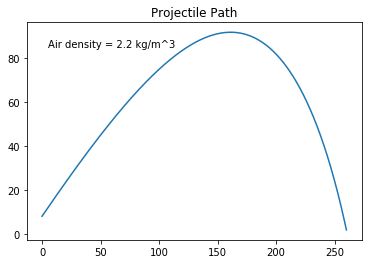

In [6]:
#plotting the trajectory
plt.plot(x,y)
plt.title("Projectile Path")
plt.text(5,85,"Air density = "+str(p)+" kg/m^3")
plt.savefig("dead")

#finding the distance traveled
for xx, yy in zip(x, y):
    if yy<=2 and yy>=-2:
        print("The distance traveled by the projectile is: "+str(xx))
        
